### **Employee Attrition: Exploratory Data Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating dataframe from dataset
df = pd.read_csv(r"C:\Users\asunday\OneDrive\Documents\Redzone\HR Employee Attrition.csv")

##### Inspecting the dataframe

In [3]:
# Viewing the top 5 rows in the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Get some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# Checking for duplicates
df.duplicated().sum()

# Chaining a .sum() methid with the duplicated() method will tell me the number of duplicated in the dataframe.


0

In [8]:
# Checking for nulls
df.isnull().sum().sum()

# In order to get the total summation of all missing values in the dataframe, I chain 2 .sum() methods together.

0

#### Cleaning the dataframe

###### The dataframe is fairly cleaned and good enough for analysis, so there is no need for cleaning.

#### **Exploratory Data Analysis**

##### **1. Does distance from home determine whether an employee leaves or stays?**

In [16]:
# Use functions to create a field ('attritionKey') that is 1 when attrition == 'Yes' and 0 when attrition = 'No'
def f(row):
    if row['Attrition'] == 'Yes':
        value = 1
    else: 
        value = 0
    return value

In [17]:
df['attritionKey'] = df.apply(f, axis = 1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attritionKey
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


##### Find the average distance from home for each attrition class

In [21]:
# Check how many unique values are in the Attrition field
df['Attrition'].unique()


array(['Yes', 'No'], dtype=object)

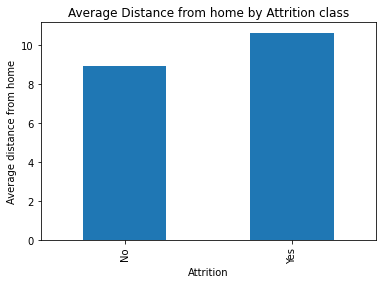

In [29]:
from matplotlib.pyplot import plot


df.groupby('Attrition')['DistanceFromHome'].mean().plot(kind = 'bar', ylabel='Average distance from home', title='Average Distance from home by Attrition class');

In [ ]:
df.spl